### What's SC-Track?

```
SC-Track is an efficient algorithm for dynamic tracking of single cells on different time-lapse microscope images. It can use the segmentation results of various models to efficiently track single cells and reconstruct cell lines. It can track multi-generational cell division events without any additional information, only using the outline information of cells; and can reduce the noise of the segmentation, so as to use the noise segmentation results to generate accurate cell lineages.
```

### Installation

To install `SC-Track`, you can run with:
```python
conda create -n sctrack python=3.10
pip install SC-Track
```
for linux or macos, you may need to run with:
```python
pip3 install SC-Track
```
note: if you try to install the package on windows, you first need to install the `pylibtiff` package, this package cannot directly install by `pip`, you need to download the wheel file from :https://www.lfd.uci.edu/~gohlke/pythonlibs/#pylibtiff, and then install it offline.

### Quick start

To using `SC-Track`, an effective way is run the command line tool, you can run with this command: 
```sh
sctrack -i ./examples/mask_annotation/01.tif -a ./examples/mask_annotation/SEG.tif
sctrack -i ./examples/json_annotation/01.tif -a ./examples/json_annotation/SEG.json
```
or 
```sh
sctrack -a ./examples/mask_annotation/SEG.tif
sctrack -a ./examples/mask_annotation/SEG.json
```

**-i/--image:** `your raw image, it's just as the background for tracking visualization, in the future, it can be used for tracking. for current version its not  necessary. if you just care about the tracking result, don't want to save tracking visualization, you can ignore this param.`

**-a/--annotation:** `your annotation file for image, these annotation files can be segmentation masks or json files. `


**<font color=red>The annotation file  format is as follows：</color>**

In [20]:
# 1. for the mask format

import tifffile
import matplotlib.pyplot as plt

SEG = './examples/mask_annotation/SEG.tif'

mask = tifffile.imread(SEG)
mask.shape

(115, 520, 696)

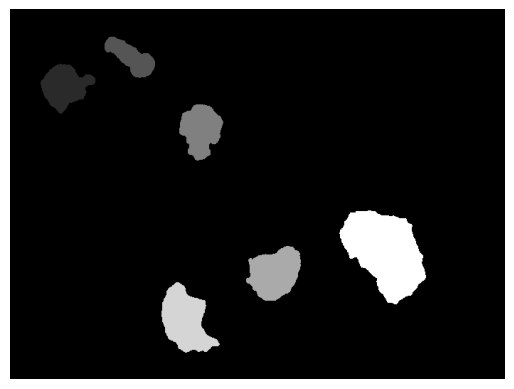

In [21]:
plt.axis('off')
plt.imshow(mask[0], cmap='gray')  # show first frame of mask

In [22]:
# for the mask image, each segmented instance must has the unique id as the mask pixel values. 
# 0 is the background pixel value, so that the instance id cannot been zero.
import numpy as np

np.unique(mask[0])

array([0, 1, 2, 3, 4, 5, 6], dtype=uint16)

-----

In [7]:
# 2. for json file format

# this format can be read by vgg image annotator, the structure as the follow:


# regions_tmp indicate each segmented instance in a single frame, "all_points_x" and "all_points_y" are the coordinates for the segmentation contours.
# in the most case,  "name" value is "polygon", but if you using ellipse to draw the mask, the "name" value is "ellipse", and  "shape_attributes" no 
# longer include "all_points_x" and "all_points_y"，but instead is "rx", "ry", "cx", "cy", "theta". 
# "region_attributes" store the extend information, if you have the classification requirement, save the classification information to  "cell_type". 
# don't need to pay attention to the  "cell_id" and "track_id", it will generate in runtime. 
regions_tmp = {
    "shape_attributes":
        {
            "name": "polygon",
            "all_points_x": ['x1', 'x2', ..., 'xn'],
            "all_points_y": ['y1', 'y2', ..., 'yn']
        },
    "region_attributes":
        {
            "cell_type": None,
            "cell_id": None,
            "track_id": None,
        }
}


# frame_tmp saves all segmented instance information in one frame, "size" = image width * image height. note: for the filename it's not necessary
# if you just want to run SC-Track, but if you want to the json  can be import by vgg image annotator, you mast make the finame endswith `.png`, 
# tiff is not support.
width = 1024
height = 1024
frame_tmp = {
        "filename": 'example.png',
        "size": width * height,
        "regions": [regions_tmp, ..., regions_tmp],
        "file_attributes": {}
    }

json_file = {
    'example_1.png': frame_tmp,
    'example_2.png': frame_tmp,
    # ...
    'example_n.png': frame_tmp
}

In [7]:
# here is a sample of a real annotation file，you can see the detail about the format.

import json
from pprint import pprint

file = "./examples/json_annotation/SEG.json"
with open(file) as f:
    annotation = json.load(f)
pprint(annotation.keys())

dict_keys(['mcy-0000.png', 'mcy-0001.png', 'mcy-0002.png', 'mcy-0003.png', 'mcy-0004.png', 'mcy-0005.png', 'mcy-0006.png', 'mcy-0007.png', 'mcy-0008.png', 'mcy-0009.png', 'mcy-0010.png', 'mcy-0011.png', 'mcy-0012.png', 'mcy-0013.png', 'mcy-0014.png', 'mcy-0015.png', 'mcy-0016.png', 'mcy-0017.png', 'mcy-0018.png', 'mcy-0019.png'])


In [9]:
pprint(annotation[list(annotation.keys())[0]].keys())

dict_keys(['filename', 'size', 'regions', 'file_attributes'])


In [12]:
pprint(annotation[list(annotation.keys())[0]]["regions"])

[{'region_attributes': {'cell_type': 'G1/G2'},
  'shape_attributes': {'all_points_x': [1163.83837890625,
                                        1162.650146484375,
                                        1161.8702392578125,
                                        1160.1978759765625,
                                        1157.6004638671875,
                                        1153.97998046875,
                                        1149.2186279296875,
                                        1143.99609375,
                                        1139,
                                        1134.3447265625,
                                        1130.1923828125,
                                        1127.18505859375,
                                        1124.63427734375,
                                        1122.6158447265625,
                                        1120.847900390625,
                                        1120.1517333984375,
                            

In [18]:
regions = annotation[list(annotation.keys())[0]]["regions"]
pprint(len(regions))
pprint(regions[0])

26
{'region_attributes': {'cell_type': 'G1/G2'},
 'shape_attributes': {'all_points_x': [1163.83837890625,
                                       1162.650146484375,
                                       1161.8702392578125,
                                       1160.1978759765625,
                                       1157.6004638671875,
                                       1153.97998046875,
                                       1149.2186279296875,
                                       1143.99609375,
                                       1139,
                                       1134.3447265625,
                                       1130.1923828125,
                                       1127.18505859375,
                                       1124.63427734375,
                                       1122.6158447265625,
                                       1120.847900390625,
                                       1120.1517333984375,
                                       111

In [15]:
pprint(annotation[list(annotation.keys())[0]]["size"])

2183299


In [14]:
pprint(annotation[list(annotation.keys())[0]]["filename"])

'mcy-0000.png'


-----------
-----------

For most cases, you may use deep learning for image segmentation, which outputs a series of masks as segmentation results. In this case, you need to combine a single frame mask into a single file. For example, your mask has 50 frames and an image size of 1024 * 1204. Finally, you need to generate a mask file with a shape of (50, 1024, 1024) as an annotation file.

In [23]:
# here is a running example using mask annotation:

!sctrack -i ./examples/mask_annotation/01.tif -a ./examples/mask_annotation/SEG.tif

2023-07-26 19:02:06 WARNING: -o  not provided, using the default output file name: ./examples/mask_annotation\output.json
2023-07-26 19:02:06 INFO: Tracking result will saved to ./examples/mask_annotation\tracking_output.
2023-07-26 19:02:06 INFO: start tracking ...
2023-07-26 19:02:06 INFO: convert mask to annotation file...

convert process: 100%|██████████| 115/115 [00:01<00:00, 79.30it/s]

tracking process: 100%|██████████| 113/113 [00:03<00:00, 33.16it/s]

save tracking visualization: 100%|██████████| 115/115 [00:00<00:00, 560.08it/s]
2023-07-26 19:02:14 INFO: tracking cost time: 8.7080


Now you can find the tracking result in `./examples/mask_annotation/tracking_output`

In [24]:
import os

os.listdir('./examples/mask_annotation/')

['01.tif', 'SEG.tif', 'tracking_output']

In [25]:
os.listdir('./examples/mask_annotation/tracking_output')

['mask',
 'result_with_track.json',
 'TRA.txt',
 'track.csv',
 'TrackTree',
 'track_visualization.tif']

In this output, `track.csv` is the main tracking result for downstream analysis, `track_visualization.tif` is the tracking visualization result.
`result_with_track.json` is is the json file introduced earlier, which contains tracking information. `TrackTree` save each tracking structure for SC-Track.

------

In [26]:
# here is a running example using json annotation:

!sctrack -i ./examples/json_annotation/01.tif -a ./examples/json_annotation/SEG.json

2023-07-26 19:11:08 WARNING: -o  not provided, using the default output file name: ./examples/json_annotation\output.json
2023-07-26 19:11:08 INFO: Tracking result will saved to ./examples/json_annotation\tracking_output.
2023-07-26 19:11:08 INFO: start tracking ...

tracking process: 100%|██████████| 18/18 [00:00<00:00, 21.63it/s]

save tracking visualization: 100%|██████████| 20/20 [00:00<00:00, 92.62it/s] 
2023-07-26 19:11:13 INFO: tracking cost time: 5.5147


**Note: the visualization is too big, the most frame are deleted, if you want to have a looking, pelase re-run these commands.**

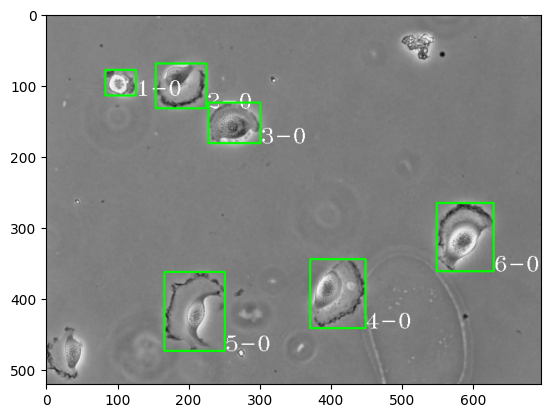

In [31]:
# now, you can see the visualization, you can re-run this cell to see the GIF.
from IPython import display
import matplotlib.pyplot as plt
filepath = './examples/mask_annotation/tracking_output/track_visualization.tif'
images = map(tifffile.imread, [os.path.join(filepath, i) for i in os.listdir(filepath)])
fig, ax = plt.subplots()
for im in images:
    plt.imshow(im)
    display.clear_output(wait=True)
    plt.show()

For the track table, it include `frame_index`, `track_id`, `cell_id`, `parent_id`, `center_x`, `center_y`, `cell_type`, `mask_of_x_points`, `mask_of_y_points`. If your tracking annotation don't have the classification information, `cell_type` column is None.

In [32]:
# here show the detail of track.csv

import pandas as pd

table = "./examples/mask_annotation/tracking_output/track.csv"

data = pd.read_csv(table)

data.head(10)

,frame_index,track_id,cell_id,parent_id,center_x,center_y,cell_type,mask_of_x_points,mask_of_y_points
0,0,1,1_0,1_0,76.429268,108.413872,NaN,"[70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 5...","[77, 78, 78, 78, 78, 79, 79, 80, 81, 81, 82, 8..."
1,1,1,1_0,1_0,73.822846,104.553082,NaN,"[80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 6...","[75, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 7..."
2,2,1,1_0,1_0,72.629953,104.476204,NaN,"[65, 64, 64, 63, 62, 61, 60, 59, 58, 57, 56, 5...","[71, 72, 73, 74, 75, 75, 76, 76, 76, 76, 76, 7..."
3,3,1,1_0,1_0,70.773744,103.675535,NaN,"[64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 5...","[69, 70, 70, 71, 72, 73, 74, 74, 75, 75, 75, 7..."
4,4,1,1_0,1_0,69.009823,104.166068,NaN,"[64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 5...","[68, 69, 69, 70, 71, 71, 72, 72, 72, 72, 73, 7..."
5,5,1,1_0,1_0,68.196681,103.643835,NaN,"[84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 7...","[63, 64, 64, 65, 65, 66, 67, 67, 67, 67, 67, 6..."
6,6,1,1_0,1_0,67.698702,107.258740,NaN,"[83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 7...","[68, 69, 69, 69, 70, 70, 71, 71, 71, 71, 71, 7..."
7,7,1,1_0,1_0,68.128047,110.159733,NaN,"[78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 6...","[74, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 7..."
8,8,1,1_0,1_0,66.384543,110.033403,NaN,"[59, 58, 58, 57, 56, 55, 54, 53, 52, 51, 50, 4...","[76, 77, 78, 79, 80, 81, 82, 83, 84, 84, 84, 8..."
9,9,1,1_0,1_0,64.326584,109.332610,NaN,"[65, 64, 63, 62, 61, 60, 59, 58, 57, 57, 56, 5...","[73, 74, 74, 74, 74, 74, 74, 75, 75, 76, 77, 7..."


In [35]:
data[-10: ]

,frame_index,track_id,cell_id,parent_id,center_x,center_y,cell_type,mask_of_x_points,mask_of_y_points
755,105,8,8_0,8_0,66.148666,439.655092,NaN,"[51, 50, 49, 49, 48, 48, 47, 46, 45, 44, 43, 4...","[391, 392, 392, 393, 394, 395, 396, 397, 398, ..."
756,106,8,8_0,8_0,64.192864,440.309949,NaN,"[50, 49, 48, 47, 46, 45, 45, 45, 44, 43, 42, 4...","[389, 390, 390, 390, 391, 392, 393, 394, 395, ..."
757,107,8,8_0,8_0,63.017219,441.408303,NaN,"[45, 44, 43, 42, 42, 41, 41, 40, 39, 38, 37, 3...","[392, 393, 393, 394, 395, 396, 397, 398, 398, ..."
758,108,8,8_0,8_0,62.962585,442.322290,NaN,"[45, 44, 43, 43, 42, 42, 42, 41, 40, 39, 38, 3...","[393, 394, 395, 396, 397, 398, 399, 400, 400, ..."
759,109,8,8_0,8_0,61.437186,445.970714,NaN,"[26, 25, 24, 23, 22, 21, 20, 20, 20, 19, 19, 1...","[401, 402, 402, 403, 403, 404, 405, 406, 407, ..."
760,110,8,8_0,8_0,60.422831,447.910387,NaN,"[35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 2...","[400, 401, 401, 401, 401, 401, 401, 401, 401, ..."
761,111,8,8_0,8_0,46.913343,441.967708,NaN,"[34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 2...","[399, 400, 400, 400, 401, 401, 400, 400, 401, ..."
762,112,8,8_0,8_0,37.244156,437.148155,NaN,"[32, 31, 30, 30, 29, 28, 27, 26, 25, 24, 23, 2...","[395, 396, 397, 398, 399, 400, 401, 402, 402, ..."
763,113,8,8_0,8_0,34.289295,436.822794,NaN,"[40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 2...","[392, 393, 393, 393, 393, 394, 395, 395, 395, ..."
764,114,8,8_0,8_0,30.439836,434.482963,NaN,"[39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 2...","[391, 392, 392, 393, 393, 394, 394, 394, 394, ..."


In [36]:
table2 = "./examples/json_annotation/tracking_output/track.csv"

data2 = pd.read_csv(table2)

data2.head(10)

,frame_index,track_id,cell_id,parent_id,center_x,center_y,cell_type,mask_of_x_points,mask_of_y_points
0,0,1,1_0,1_0,1141.681007,121.843101,G1,"[1163.83837890625, 1162.650146484375, 1161.870...","[124, 128.70431518554688, 133.47317504882812, ..."
1,1,1,1_0,1_0,1140.897439,124.273174,G1,"[1162.5257568359375, 1161.6224365234375, 1161....","[126, 130.49989318847656, 135.15316772460938, ..."
2,2,1,1_0,1_0,1141.455120,125.370569,G1,"[1162.7320556640625, 1161.6827392578125, 1161....","[128, 132.51187133789062, 137.15658569335938, ..."
3,3,1,1_0,1_0,1143.193163,126.471540,G1,"[1165.24169921875, 1164.1068115234375, 1163.30...","[129, 133.59622192382812, 138.24099731445312, ..."
4,4,1,1_0,1_0,1140.873121,128.155217,G1,"[1162.072998046875, 1161.0616455078125, 1160.4...","[130, 134.38832092285156, 138.88424682617188, ..."
5,5,1,1_0,1_0,1142.286836,128.403812,G1,"[1163.823486328125, 1162.48046875, 1161.516601...","[130, 134.4716339111328, 138.9124755859375, 14..."
6,6,1,1_0,1_0,1143.131089,129.264242,G1,"[1165.065673828125, 1163.7344970703125, 1162.7...","[132, 136.5221710205078, 141.0296173095703, 14..."
7,7,1,1_0,1_0,1148.622562,129.589738,G1,"[1170.7003173828125, 1169.4932861328125, 1168....","[129, 132.87745666503906, 136.76820373535156, ..."
8,8,1,1_0,1_0,1147.243467,129.767052,G1,"[1168.9228515625, 1167.4478759765625, 1166.328...","[132, 136.4651641845703, 140.83445739746094, 1..."
9,9,1,1_0,1_0,1149.192897,129.618784,G1,"[1170.347900390625, 1169.0052490234375, 1167.9...","[131, 135.37710571289062, 139.6844024658203, 1..."


In these fields, The same **track_id** indicates that the cell is the same cell or a daughter cell derived from the cell division. in contrast，the **cell_id** is different, the same cell_id indicates that the cell is the same cell, when the cell has been division, this cell_id will be terminate. **parent_id** is the cell_id of the mother cell of the cell, if cell doesn't undergo the cell division, the parent_id is same as it cell_id. 

If you want to use the SC-Track's API, please refer [here](./API.ipynb).